## Neural Network

- 2 Layer
- ReLU Activation(1st layer)
- SoftMax Activation(Output)

In [1]:
## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Run some setup code for this notebook.
import random
import numpy as np
import pandas as pd
from mnist import MNIST

import sys
sys.path.append('./..')
from py_model.neural_network import NeuralNetwork

%load_ext autoreload
%autoreload 2

#### Download Mnist
http://yann.lecun.com/exdb/mnist/
- train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
- train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
- t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
- t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [3]:
mndata = MNIST() # Current Path
train_X, train_y = mndata.load_training()
test_X, test_y = mndata.load_testing()

train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
layer1 = {'layer': (28*28, 2048), 'activation': lambda x: np.maximum(0, x) }  # ReLu
layer2 = {'layer': (2048, 10)} 
#output layer Softmax

nn = NeuralNetwork(layer1, layer2)

In [5]:
nn.train(train_X, train_y, learning_rate=0.00001, reg=0.001, num_iters=1500, batch_size=50, verbose=True)

Epoch :  1  loss= 2.29884877209
Epoch :  51  loss= 1.37990373207
Epoch :  101  loss= 1.05176798283
Epoch :  151  loss= 0.794148959264
Epoch :  201  loss= 0.64742872707
Epoch :  251  loss= 0.695958295887
Epoch :  301  loss= 0.565640322665
Epoch :  351  loss= 0.565767438905
Epoch :  401  loss= 0.442821239494
Epoch :  451  loss= 0.453024258281
Epoch :  501  loss= 0.433725847713
Epoch :  551  loss= 0.356058277456
Epoch :  601  loss= 0.451493117118
Epoch :  651  loss= 0.393549269298
Epoch :  701  loss= 0.239008526204
Epoch :  751  loss= 0.530327858545
Epoch :  801  loss= 0.227423262816
Epoch :  851  loss= 0.270901359809
Epoch :  901  loss= 0.31529382297
Epoch :  951  loss= 0.246056648586
Epoch :  1001  loss= 0.249935090069
Epoch :  1051  loss= 0.256949546949
Epoch :  1101  loss= 0.37935012201
Epoch :  1151  loss= 0.237820234653
Epoch :  1201  loss= 0.376470335974
Epoch :  1251  loss= 0.371324902082
Epoch :  1301  loss= 0.255272851267
Epoch :  1351  loss= 0.285904122799
Epoch :  1401  loss= 

In [6]:
# Accuracy
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

Accuracy : 91.62%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


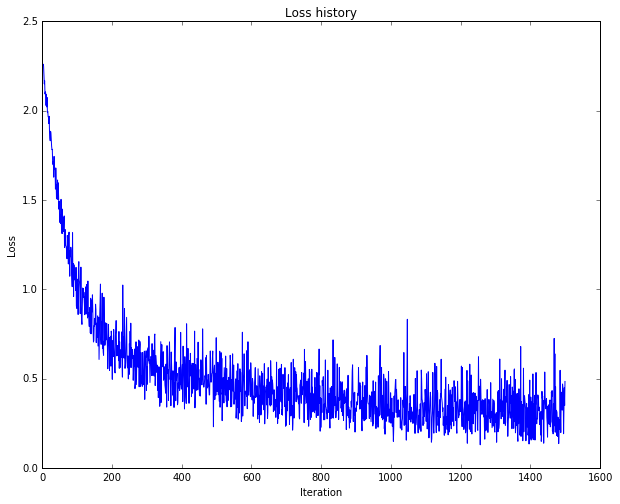

In [7]:
# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()